# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ika Widiyanti]
- **Email:** [ikawidiyanti132@gmail.com]
- **ID Dicoding:** [ika_widiyanti_17NR]

## Menentukan Pertanyaan Bisnis



```
# Ini diformat sebagai kode
```

- Pertanyaan 1 :
Apakah pola penyewaan sepeda berbeda antara akhir pekan dan hari kerja
- Pertanyaan 2 :
 Apakah penyewaan sepeda meningkat di musim-musim tertentu pertahunnya?
- Pertanyaan 3 :
Apakah pengguna terdaftar lebih sering menyewa sepeda pada jam-jam sibuk dibandingkan pengguna biasa?

## Import Semua Packages/Library yang Digunakan

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [173]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')

bike_df = pd.merge(day_df, hour_df, on='dteday', how='left')
bike_df

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- x (day), y (hour)
- Pada analisis ini menggunakan dataset tentang "bike sharing dataset' yang diperoleh dari [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- Terdapat dua file csv yang pertama ada file day.csv dan yang kedua ada file hour.csv. Isi kedua file csv tersebut adalah
  - instant: indeks catatan
	- dteday : tanggal
	- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
	- yr : tahun (0: 2011, 1: 2012)
	- bulan : bulan (1 sampai 12)
	- hr : jam (0 hingga 23)
	- holiday : hari cuaca hari libur atau tidak (diambil dari http://dchr.dc.gov/page/holiday-schedule)
	- hari kerja : hari dalam seminggu
	- hari kerja : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
	+ cuaca :
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
	- temp: Suhu yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 41 (maks)
	- atemp: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai dibagi menjadi 50 (maks)
	- hum: Kelembapan yang dinormalisasi. Nilai dibagi menjadi 100 (maks)
	- windspeed: Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
	- casual: jumlah pengguna biasa
	- terdaftar: jumlah pengguna terdaftar
	- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar

Bedanya kolom 'hr' tidak ada di file day.csv, disini menggunakan metode 'merge()' untuk menggabungkan kedua file menjadi satu dataframe dan menghasilkan 17379 rows × 32 columns

### Assessing Data

In [174]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   holiday_x     17379 non-null  int64  
 6   weekday_x     17379 non-null  int64  
 7   workingday_x  17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  season_y      17379 non-null  int64  
 18  yr_y          17379 non-nu

In [175]:
bike_df.isnull().sum()

,0
instant_x,0
dteday,0
season_x,0
yr_x,0
mnth_x,0
holiday_x,0
weekday_x,0
workingday_x,0
weathersit_x,0
temp_x,0


In [176]:
bike_df.duplicated().sum()

0

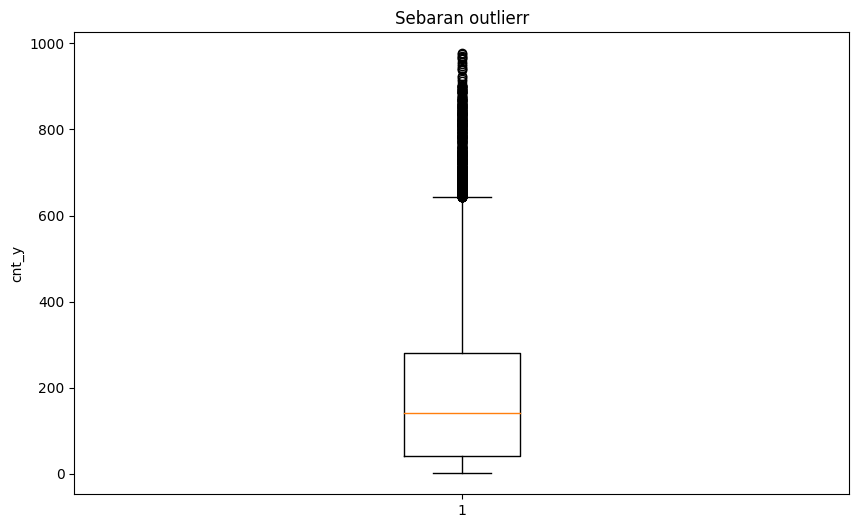

In [177]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bike_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return bike_outliers

#box plot outlier
fig, axs = plt.subplots(figsize=(10, 6))
axs.boxplot(bike_df['cnt_y'])
axs.set_title('Sebaran outlierr')
axs.set_ylabel('cnt_y')

plt.show()

**Insight:**
- Kolom 'dteday' yang awalnya bertype data int harus diubah menjadi type data datetime
- Tidak ada missing value alias datanya sudah bersih
- Tidak ada duplikat data
- Berdasarkan analisis outlier dikolom 'cnt_y' diperoleh bahwa terdapat banyak outlier (titik-titik hitam) di atas garis vertikal yang di atas kotak pada bagian boxplot,yang berarti terdapat beberapa jam dengan jumlah pengguna yang jauh lebih tinggi dibandingkan kebanyakan data lainnya.

### Cleaning Data

In [178]:
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [179]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

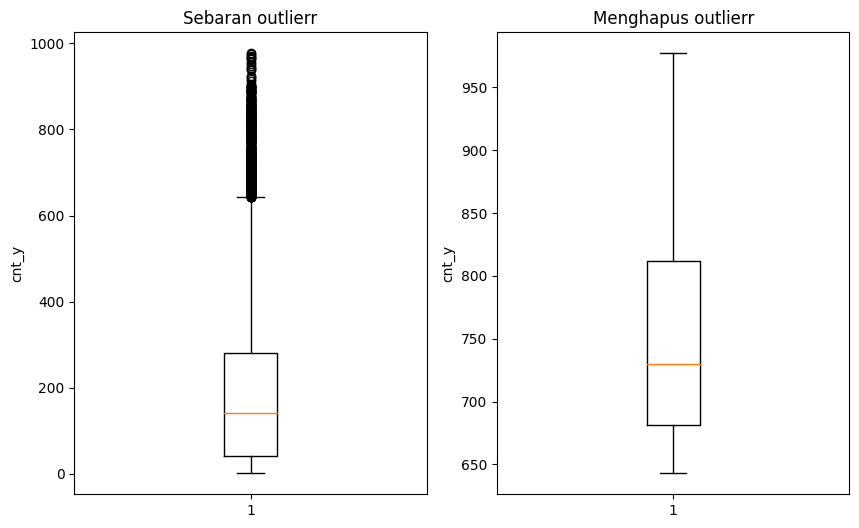

In [180]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    bike_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return bike_outliers


#mendeteksi dan menghapus outlier dari kolom 'cnt_y'
bike_outliers = detect_outliers(bike_df, 'cnt_y')

#box plot outlier
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

#Sebelum oulier dihapus
axs[0].boxplot(bike_df['cnt_y'])
axs[0].set_title('Sebaran outlierr')
axs[0].set_ylabel('cnt_y')

#Menghapus outlier
axs[1].boxplot(bike_outliers['cnt_y'])
axs[1].set_title('Menghapus outlierr')
axs[1].set_ylabel('cnt_y')

plt.show()

**Insight:**
- Kolom 'dteday' sudah berhasil diubah menjadi type data datetime menggunakan 'pd.to_datetime'
- Berdasarkan gambar tersebut dihasilkan ada dua gambar sebelum penghapusan outlier dan sesudah penghapusan. Berdasarkan hasilnya diperoleh bahwa pada kolom 'menghapus outlier',outlier sudah bersih. Terlihat dari titik-titik hitam yang sudah tidak ada. Boxplot 'menghapus outlier' menunjukkan distribusi data yang lebih terpusat dan simetris,tanpa ada outlier yang mencolok dibagian atas.

## Exploratory Data Analysis (EDA)

### Explore ...

**Pertanyaan**
1. Berapa rata-rata jumlah penyewa sepeda berdasarkan musim
2. Berapa rata-rata jumlah penyewaan sepeda pertahunnya?
3. Kapan waktu ideal orang menyewa sepeda,apakah ketika akhir pekan atau hari kerja?
4. Kapan Waktu terbaik menggunakan sepeda?
5. Apakah pelanggan terdaftar lebih banyak menyewa sepeda dibandingkan pelanggan biasa berdasarkan jamnya?

In [181]:
day_df = pd.read_csv('/content/day.csv')
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [182]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [183]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Insight : Tidak ada missing value

In [184]:
day_df.duplicated().sum()

0

Insight : Tidak ada data duplikat

In [185]:
day_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [186]:
day_df.groupby('season')['cnt'].mean().sort_values(ascending=False)

,cnt
season,
3,5644.303191
2,4992.331522
4,4728.162921
1,2604.132597


Insight : Diperoleh bahwa untuk musim di ilustrasikan (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin). Jumalah penyewa sepeda terbanyak itu pada musim gugur dan paling rendah pada musim semi. Hal ini bisa dikarenakan faktor cuaca,misalnya musim gugur karena cuaca cenderung sejuk dan nyaman untuk bersepeda sedangkan jika musim semi karena cuaca yang tidak menentu dan kemungkinan hujan lebih sering. Kondisi ini dapat digunakan untuk bisnis penyewaan sepeda dalam meningkatkan perencanaan,pemasaran,dan pengembangan layanannya.

In [187]:
day_df.groupby('yr')['cnt'].mean().sort_values(ascending=False)

,cnt
yr,
1,5599.934426
0,3405.761644


Insight : Tahun (0: 2011, 1: 2012)
Didapatkan bahwa pada tahun 2012 jumlah penyewaan sepeda meningkat dibandingkan tahun 2011.

<ipython-input-188-aea4206e24ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='workingday', y='cnt', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0, 0.5, 'Jumlah Penyewaan')

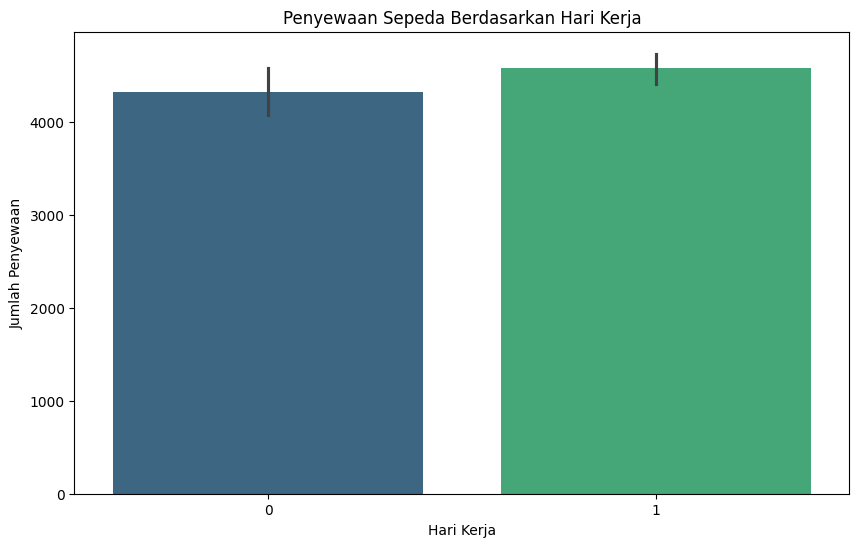

In [188]:
plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='workingday', y='cnt', palette='viridis')
plt.title('Penyewaan Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Penyewaan')

Insight : Hari kerja = 0 , akhir pekan = 1
Berdasarkan hasil visualisasi tersebut di peroleh bahwa orang-orang lebih banyak menyewa atau bersepeda ketika akhir pekan. Dikarenakan akhir pekan adalah waktu untuk beristirahat dari lelahnya kegiatan di hari kerja. Dan hari kerja biasanya digunakan orang-orang untuk melakukan akitivitas seperti sekolah,kerja,dll

In [189]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [190]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [191]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [192]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Insight : Tidak ada missing value

In [193]:
hour_df.duplicated().sum()

0

Insight : Tidak ada data duplikat

In [194]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<ipython-input-195-d8a04df3559b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_df, x='hr', y='cnt', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

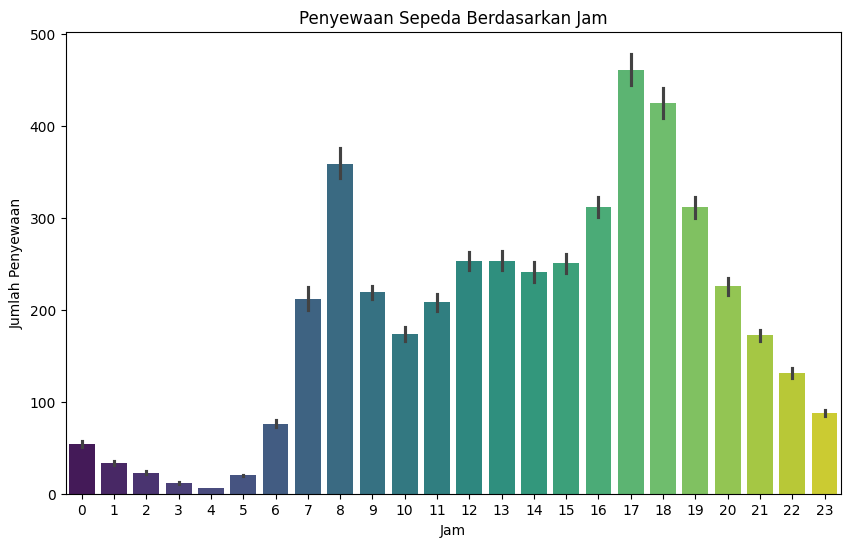

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df, x='hr', y='cnt', palette='viridis')
plt.title('Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Insight: Berdasarkan visualisasi tersebut di dapatkan bahwa jumlah penyewaan sepeda lebih banyak dipakai pada jam kerja/jam sibuk yaitu dari jam 8 dan tinggi lagi ketiga jam pulang kerja yaitu jam 17 atau 5 sore.

In [196]:
hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean"
})

,casual,registered
hr,,
0,10.158402,43.739669
1,6.504144,26.871547
2,4.772028,18.097902
3,2.715925,9.011478
4,1.253945,5.098996
5,1.411437,18.478382
6,4.161379,71.882759
7,11.055021,201.009629
8,21.679505,337.331499


**Insight:**
Berdasarkan analisis tersebut didapatkan bahwa pelanggan terdaftar memiliki waktu penyeewaan sepeda lebih banyak dibandingkan pelanggan biasa. Dikarenakan pelanggan terdaftar lebih sering menyewa sepeda pada jam-jam sibuk seperti di jam kerja,dan mereka mendapatkan keuntungan lebih dari biaya langganan yang telah mereka bayar. Sedangkan pelanggan biasa biasanya hanya menggunakan sepeda untuk rekreasi atau tidak kegiatan rutin yang sering dilakukan hanya diakhir pekan atau bukan jam kerja. Keuntungan untuk perusahaan penyewa sepeda bisa fokus memberikan layanan yang lebih baik pada pelanggan terdaftar selama jam-jam kerja dan bisa menawarkan promosi kepada pelanggan biasa pada akhir pekan atau di luar jam sibuk untuk menarik lebih banyak pengguna biasa.








## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah pola penyewaan sepeda berbeda antara akhir pekan dan hari kerja

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


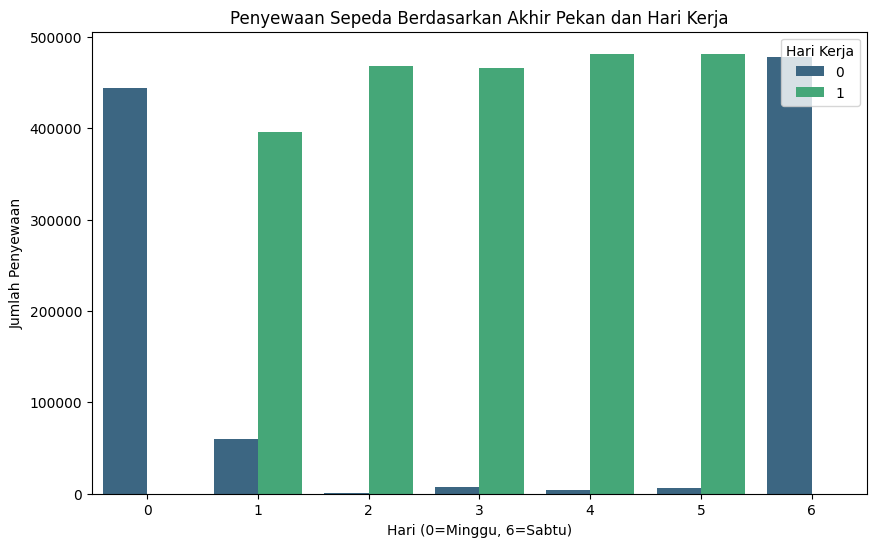

In [197]:
#mengelompokkan data
user = bike_df.groupby(['weekday_x','workingday_x'])['cnt_y'].sum().reset_index()
#membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=user, x='weekday_x', y='cnt_y', hue='workingday_x', palette='viridis')
plt.title('Penyewaan Sepeda Berdasarkan Akhir Pekan dan Hari Kerja')
plt.xlabel('Hari (0=Minggu, 6=Sabtu)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Hari Kerja', loc='upper right')
plt.show()

Insight :
- Batang warna biru nomor (0) = Akhir pekan
- Batang hijau nomor (1) = hari kerja
- Hari minggu (0) jumlah penyewaan sepeda cukup tinggi dibandingkan hari lainnya diakhir pekan. Karena banyak orang yang memanfaatkan waktu luang untuk menyewa sepeda,untuk sekedar berekreasi atau olahraga.
- Hari sabtu (6) juga jumlah penyewaan sepeda tinggi setara dengan hari kerja. Mungkin karena hari sabtu oleh sebagian orang masih dianggap sebagai hari kerja,karena pada hari itu sebagian orang masih melakukan aktivitasnya dan sebagian lagi menggunakannya untuk aktivitas santai.
- Untuk hari kerja (1-5) jumlah penyeewa sepeda konsisten tinggi karena merupakan hari kerja/sibuk melakukan segala aktivitas. Hal ini terjadi sebab banyak pelanggan yang menggunakan sepeda sebagai alat transportasi hariannya,misalnya untuk pergi ke kantor atau ke sekolah,dll.
- Sedangkan untuk hari senin (1) sedikit lebih menurun dibandingkan hari kerja lain,karena hari senin adalah awal untuk memulai aktivitas kembali setelah libur. Biasanya ketika hari senin peningkatan kemacetan di jalan bertambah,mungkin karena itu jumlah penyewa sepeda dihari senin sedikit karena orang-orang lebih memilih menggunakan transportasi lain seperti Gojek,Kereta,dan lainnya agar tidak terkena macet dan terlambat.
- Berdasarkan hasil analisis ini perusahaan penyewa sepeda dapat meningkatkan layanannya. Mungkin ketika akhir pekan (sabtu dan minggu) dan juga hari senin perusahaan bisa menawarkan promosi atau diskon,untuk mendorong lebih banyak orang dalam menyewa sepeda. Sedangkan untuk hari kerja bisa lebih ditingkatkan layanan pada jam-jam sibuk seperti pagi dan sore hari,ketika orang-orang berangkat dan pulang kerja untuk mendukung kenyamanan dan kebutuhan pelanggan.

### Pertanyaan 2: Apakah penyewaan sepeda meningkat di musim-musim tertentu pertahunnya?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

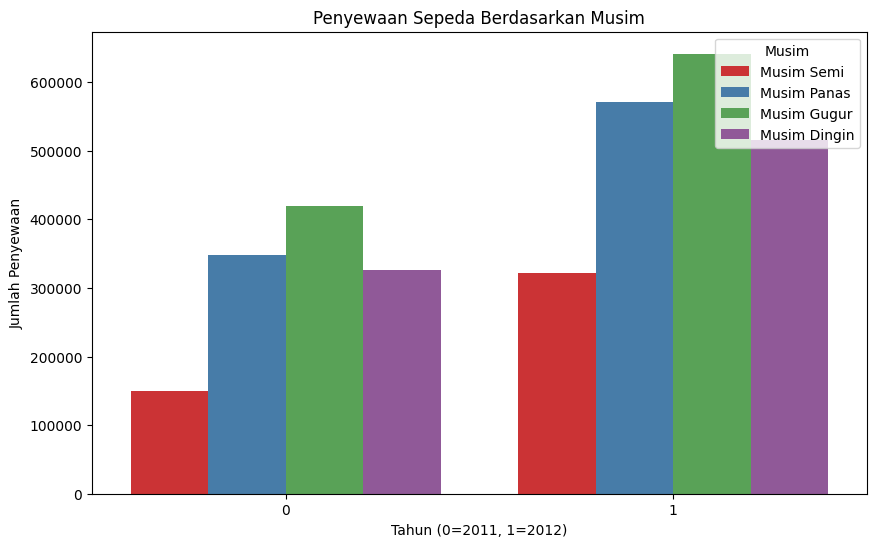

In [198]:
season_df = bike_df.groupby(['yr_x', 'season_x'])['cnt_y'].sum().reset_index()

#Memberikan deskripsi pada season
season_mapping = {
    1: 'Musim Semi',
    2: 'Musim Panas',
    3: 'Musim Gugur',
    4: 'Musim Dingin'
}
season_df['season_x'] = season_df['season_x'].map(season_mapping)

#Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=season_df, x='yr_x', y='cnt_y', hue='season_x', palette='Set1')
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Tahun (0=2011, 1=2012)')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Musim', loc='upper right')
plt.show()

**Insight:**
- Batang merah = musim semi
- Batang biru = musim panas
- Batang hijau = musim gugur
- Batang ungu = musim dingin
- angka 0 = Tahun 2011
- Angka 1 = 2012
- Jumlah penyewaan sepeda mengalami kenaikan yang signifikan dari tahun ke tahunnya. Hal ini dapat disimpulkan bahwa minat orang untuk bersepeda meningkat setiap tahunnya.
- Musim Ramai : Dari tahun ke tahun aktivitas penyewaan sepeda paling ramai ketika musim gugur dan musim panas. Hal ini mungkin dikarena pada kedua musim tersebut sangat mendukung untuk aktivitas bersepeda.
- Musim Sepi : Dari tahun ke tahun musim penyewaan sepeda sepi terjadi pada musim dingin dan musim semi. Hal ini dikarenakan pada kedua musim tersebut tidak cocok digunakan untuk aktivitas bersepeda. Orang-orang banyak memilih untuk berdiam diri dirumah karena udara yang dingin dan cuaca hujan yang tidak menentu membuat kegiatan diluar rumah akan merepotkan dan tidak nyaman apalagi untuk bersepeda.
- Analisis ini dapat dimanfaatkan perusahaan untuk meningkatkan penyewaan sepeda mereka. Ketika musim yang sepi perusahaan bisa membuat strategi promosi untuk menarik banyak pelanggan. Ketika musim yang ramai perusahaan bisa mengoptimalkan ketersedian sepeda. Dengan prediksi jumlah pelanggan pada musim tersebut,perusahaan dapat memastikan ketersediaan sepeda agar tidak kekurangan dan menghindari kelebihan persediaan pada musim semi. Selain itu juga dapat digunakan untuk mengembangkan lebih banyak jalur sepeda dengan fasilitas pendukung yang baik.


## Pertanyaan 3 : Apakah pengguna terdaftar lebih sering menyewa sepeda pada jam-jam sibuk dibandingkan pengguna biasa?


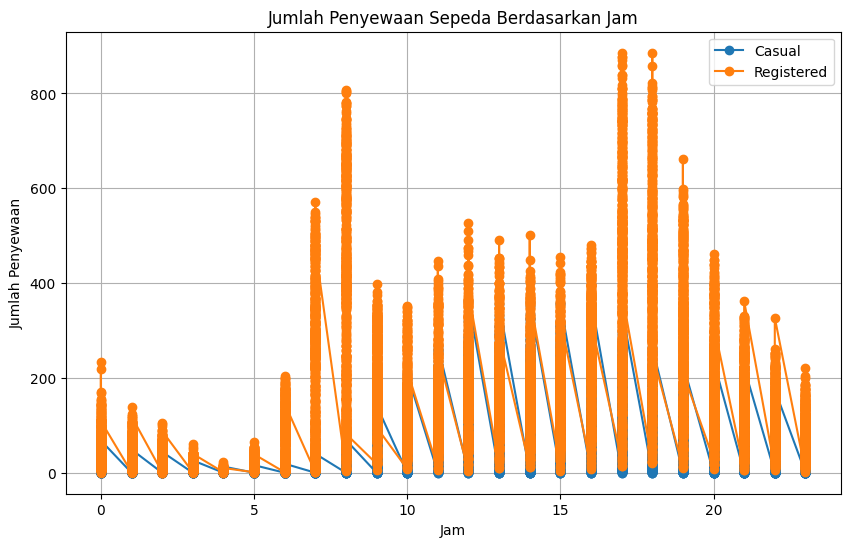

In [199]:
df_jam = bike_df.groupby(['hr', 'casual_y', 'registered_y'])['cnt_y'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_jam['hr'], df_jam['casual_y'], label='Casual', marker='o')
plt.plot(df_jam['hr'], df_jam['registered_y'], label='Registered', marker='o')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.grid(True)
plt.show()

Insight :
- Pelanggan biasa = warna biru
- Pelanggan terdaftar = Warna orens
- Pelanggan terdaftar cenderung jumlah penyewaan sepeda lebih tinggi dibandingkan pelanggan biasa. Hal ini mungkin karena pelanggan terdaftar memiliki keuntungan lebih karena sudah membayar dan sudah berlangganan tetap. Sedangkan pelanggan biasa hanya menyewa sepeda ketika dia butuh untuk sekedar rekreasi atau olahraga saja dan penyewaannya tidak tetap.
- Jam penyewaan sangat tinggi terjadi ketika jam sibuk atau jam kerja,misalnya ketika jam berangkat kerja dan jam pulang kerja. Kenaikan pada jam sibuk terjadi pada pelanggan biasa dan terdaftar tapi lebih meningkat untuk pelanggan terdaftar.
- Jam sepi terjadi pada jam-jam tertentu. Mungkin ketika jam-jam orang-orang masih melakukan aktivitasnya,masih berada disekolah/kantor,dan juga diwaktu malam hari ketika waktunya istirahat.
- Hal ini sangat menguntungkan bagi perusahaan penyewaan sepeda karena mereka dapat mengoptimalkan waktu operasional penyewaannya. Misalnya menambah sepeda ketika di jam-jam sibuk/kerja yaitu ketika jam pergi kerja atau pulang kerja atau memindahkan sepeda ke tempat yang pelanggannya tinggi. Selain itu dapat juga digunakan untuk membuat promosi atau tawaran khusus,seperti paket langganan kepada pengguna terdaftar ataupun biasa yang sering menyewa sepeda dijam-jam tertentu dan bisa menarik pelanggan lebih banyak.

## Conclusion

- Conclution pertanyaan 1
1. Akhir pekan jumlah penyewaan sepeda tinggi.
2. Untuk hari kerja (1-5) jumlah penyeewa sepeda konsisten tinggi karena merupakan hari kerja/sibuk melakukan segala aktivitas. Hal ini terjadi sebab banyak pelanggan yang menggunakan sepeda sebagai alat transportasi hariannya,misalnya untuk pergi ke kantor atau ke sekolah,dll.
Sedangkan untuk hari senin (1) sedikit lebih menurun dibandingkan hari kerja lain,karena hari senin adalah awal untuk memulai aktivitas kembali setelah libur. Biasanya ketika hari senin peningkatan kemacetan di jalan bertambah,mungkin karena itu jumlah penyewa sepeda dihari senin sedikit karena orang-orang lebih memilih menggunakan transportasi lain seperti Gojek,Kereta,dan lainnya agar tidak terkena macet dan terlambat.
- Conclution pertanyaan 2
1. Musim Ramai : Dari tahun ke tahun aktivitas penyewaan sepeda paling ramai ketika musim gugur dan musim panas.
2. Musim Sepi : Dari tahun ke tahun musim penyewaan sepeda sepi terjadi pada musim dingin dan musim semi.
3. Jumlah penyewaan sepeda mengalami kenaikan yang signifikan dari tahun ke tahunnya. Hal ini dapat disimpulkan bahwa minat orang untuk bersepeda meningkat setiap tahunnya.

Conclution Pertanyaan 3
1. Pelanggan terdaftar cenderung jumlah penyewaan sepeda lebih tinggi dibandingkan pelanggan biasa
2. Jam penyewaan sangat tinggi terjadi ketika jam sibuk atau jam kerja,misalnya ketika jam berangkat kerja dan jam pulang kerja
3. Jam sepi terjadi pada jam-jam tertentu. Mungkin ketika jam-jam orang-orang masih melakukan aktivitasnya,masih berada disekolah/kantor,dan juga diwaktu malam hari ketika waktunya istirahat.